In [7]:
import pandas as pd
import os 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
#creating variables for each df in path
path = r'C:\Users\USER\Desktop\Analysis\python_hackerU\formula\data'
csv_list = [i for i in os.listdir(path)]

for i in csv_list:
    globals()[os.path.splitext(i)[0]] = pd.read_csv(os.path.join(path,i),na_values = r'\N')

#droping unnecessery columns from races
races = races.drop(races.columns[7:],axis = 1)

# Basic information:

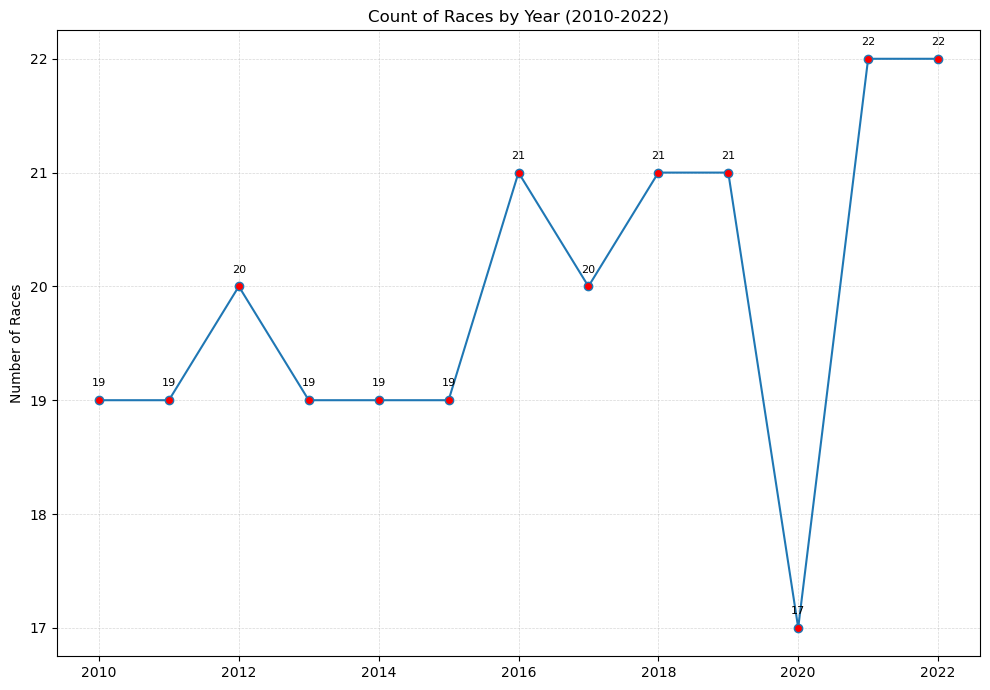

In [34]:
#How many races are there for each year from 2010 until 2022
count_race_year = races.groupby(['year'])['raceId'].count().reset_index()
count_race_year_2010 = count_race_year[count_race_year['year'].between(2010,2022)]
count_race_year_2010
figure = plt.figure(figsize = (10,7))

plt.plot(count_race_year_2010['year'],count_race_year_2010['raceId'],marker = 'o',markerfacecolor = 'r')

for x, y in zip(count_race_year_2010['year'], count_race_year_2010['raceId']):
    plt.annotate(y,  # text to display
                 (x, y),  # point to label
                 textcoords="offset points",  # how to position the text
                 xytext=(0,10),  # distance from text to points (x,y)
                 ha='center',  # horizontal alignment
                 fontsize=8)

plt.title('Count of Races by Year (2010-2022)')
plt.ylabel('Number of Races')
plt.grid(True, which='both', linestyle='--', linewidth=0.5,alpha = 0.5)
plt.tight_layout()
plt.show()

In [109]:
# Top 10 constructors from 2010 to 2022 
top_10_constructors_2010_2022 = constructor_results.groupby(['constructorId'])['points'].sum().reset_index().sort_values(by = 'points',ascending = False).merge(constructors[['constructorId','name']],how = 'left',on = 'constructorId').head(10)
top_10_constructors_2010_2022 = top_10_constructors_2010_2022[['constructorId','name','points']]
top_10_constructors_2010_2022

constructorId         name  points
0              6      Ferrari  9314.0
1            131     Mercedes  6813.5
2              9     Red Bull  6388.0
3              1      McLaren  6088.5
4              3     Williams  3598.0
5              4      Renault  1777.0
6             10  Force India  1098.0
7             32   Team Lotus   918.0
8             22     Benetton   861.5
9            208     Lotus F1   706.0

In [84]:
constructor_standings_plus_year = constructor_standings.merge(races[['raceId','year']],on = 'raceId')
constructor_standings_plus_year = constructor_standings_plus_year[constructor_standings_plus_year['year'].between(2010,2022)]
constructor_standings_plus_year.head(2)

constructorStandingsId  raceId  constructorId  points  position  \
10170                   24232     337              6    43.0         1   
10171                   24233     337              1    21.0         2   

      positionText  wins  year  
10170            1     1  2010  
10171            2     0  2010

In [125]:
constructor_standings_Ferrari

raceId  year  constructorId     name  points  position  wins  cum_sum
0       337  2010              6  Ferrari    43.0         1     1        1
1       338  2010              6  Ferrari    70.0         1     1        2
2       339  2010              6  Ferrari    76.0         1     1        3
3       340  2010              6  Ferrari    90.0         2     1        5
4       341  2010              6  Ferrari   116.0         2     1        7
..      ...   ...            ...      ...     ...       ...   ...      ...
254    1092  2022              6  Ferrari   454.0         2     4      687
255    1093  2022              6  Ferrari   469.0         2     4      689
256    1094  2022              6  Ferrari   487.0         2     4      691
257    1095  2022              6  Ferrari   524.0         2     4      693
258    1096  2022              6  Ferrari   554.0         2     4      695

[259 rows x 8 columns]

In [153]:
#Top 4 constructors  comperison(position base - less is better)

In [154]:
constructor_standings_Ferrari = constructor_standings_plus_year[constructor_standings_plus_year['constructorId'] == 6].merge(constructors[['constructorId','name']],on = 'constructorId')
constructor_standings_Ferrari = constructor_standings_Ferrari[['raceId','year','constructorId','name','points','position','wins']]
constructor_standings_Ferrari['cum_sum'] = constructor_standings_Ferrari.groupby(['year'])['position'].cumsum()

constructor_standings_Mercedes = constructor_standings_plus_year[constructor_standings_plus_year['constructorId'] == 131].merge(constructors[['constructorId','name']],on = 'constructorId')
constructor_standings_Mercedes = constructor_standings_Mercedes[['raceId','year','constructorId','name','points','position','wins']]
constructor_standings_Mercedes['cum_sum'] = constructor_standings_Mercedes.groupby(['year'])['position'].cumsum()

constructor_standings_Red_Bull = constructor_standings_plus_year[constructor_standings_plus_year['constructorId'] == 9].merge(constructors[['constructorId','name']],on = 'constructorId')
constructor_standings_Red_Bull = constructor_standings_Red_Bull[['raceId','year','constructorId','name','points','position','wins']]
constructor_standings_Red_Bull['cum_sum'] = constructor_standings_Red_Bull.groupby(['year'])['position'].cumsum()

constructor_standings_McLaren = constructor_standings_plus_year[constructor_standings_plus_year['constructorId'] == 1].merge(constructors[['constructorId','name']],on = 'constructorId')
constructor_standings_McLaren= constructor_standings_McLaren[['raceId','year','constructorId','name','points','position','wins']]
constructor_standings_McLaren['cum_sum'] = constructor_standings_McLaren.groupby(['year'])['position'].cumsum()


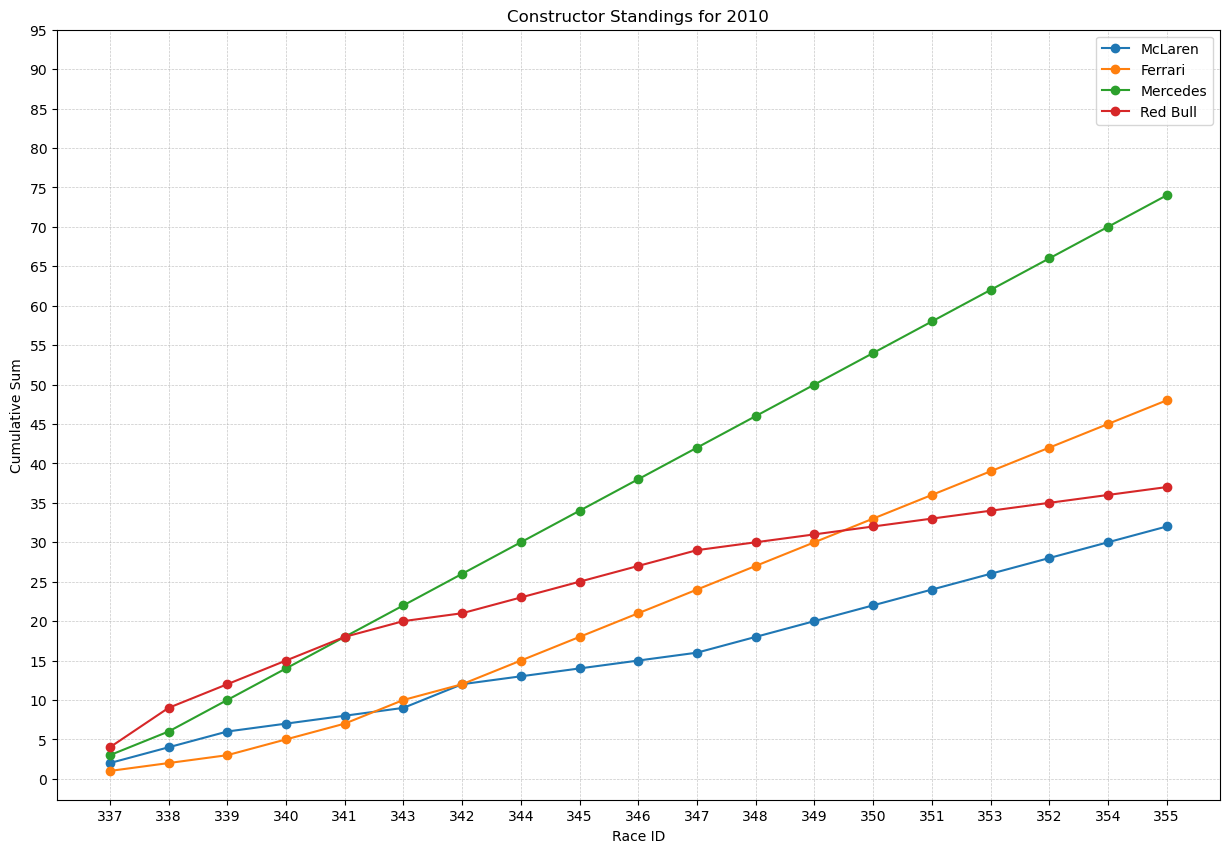

In [170]:

figure_1 = plt.figure(figsize=(15, 10))
year = 2010

plt.plot(constructor_standings_McLaren[constructor_standings_McLaren['year'] == year]['raceId'].astype(str),
         constructor_standings_McLaren[constructor_standings_McLaren['year'] == year]['cum_sum'],
         label="McLaren",marker = 'o')

plt.plot(constructor_standings_Ferrari[constructor_standings_Ferrari['year'] == year]['raceId'].astype(str),
         constructor_standings_Ferrari[constructor_standings_Ferrari['year'] == year]['cum_sum'],
         label="Ferrari",marker = 'o')

plt.plot(constructor_standings_Mercedes[constructor_standings_Mercedes['year'] == year]['raceId'].astype(str),
         constructor_standings_Mercedes[constructor_standings_Mercedes['year'] == year]['cum_sum'],
         label="Mercedes",marker = 'o')

plt.plot(constructor_standings_Red_Bull[constructor_standings_Red_Bull['year'] == year]['raceId'].astype(str),
         constructor_standings_Red_Bull[constructor_standings_Red_Bull['year'] == year]['cum_sum'],
         label="Red Bull",marker = 'o')

plt.legend()
plt.xlabel('Race ID')
plt.ylabel('Cumulative Sum')
plt.title('Constructor Standings for 2010')
plt.yticks(np.arange(0, 100, 5))
plt.grid(True, which='both', linestyle='--', linewidth=0.5,alpha = 0.7)

plt.show()
#Top 4 constructors 2020 comperison(position base - less is better)

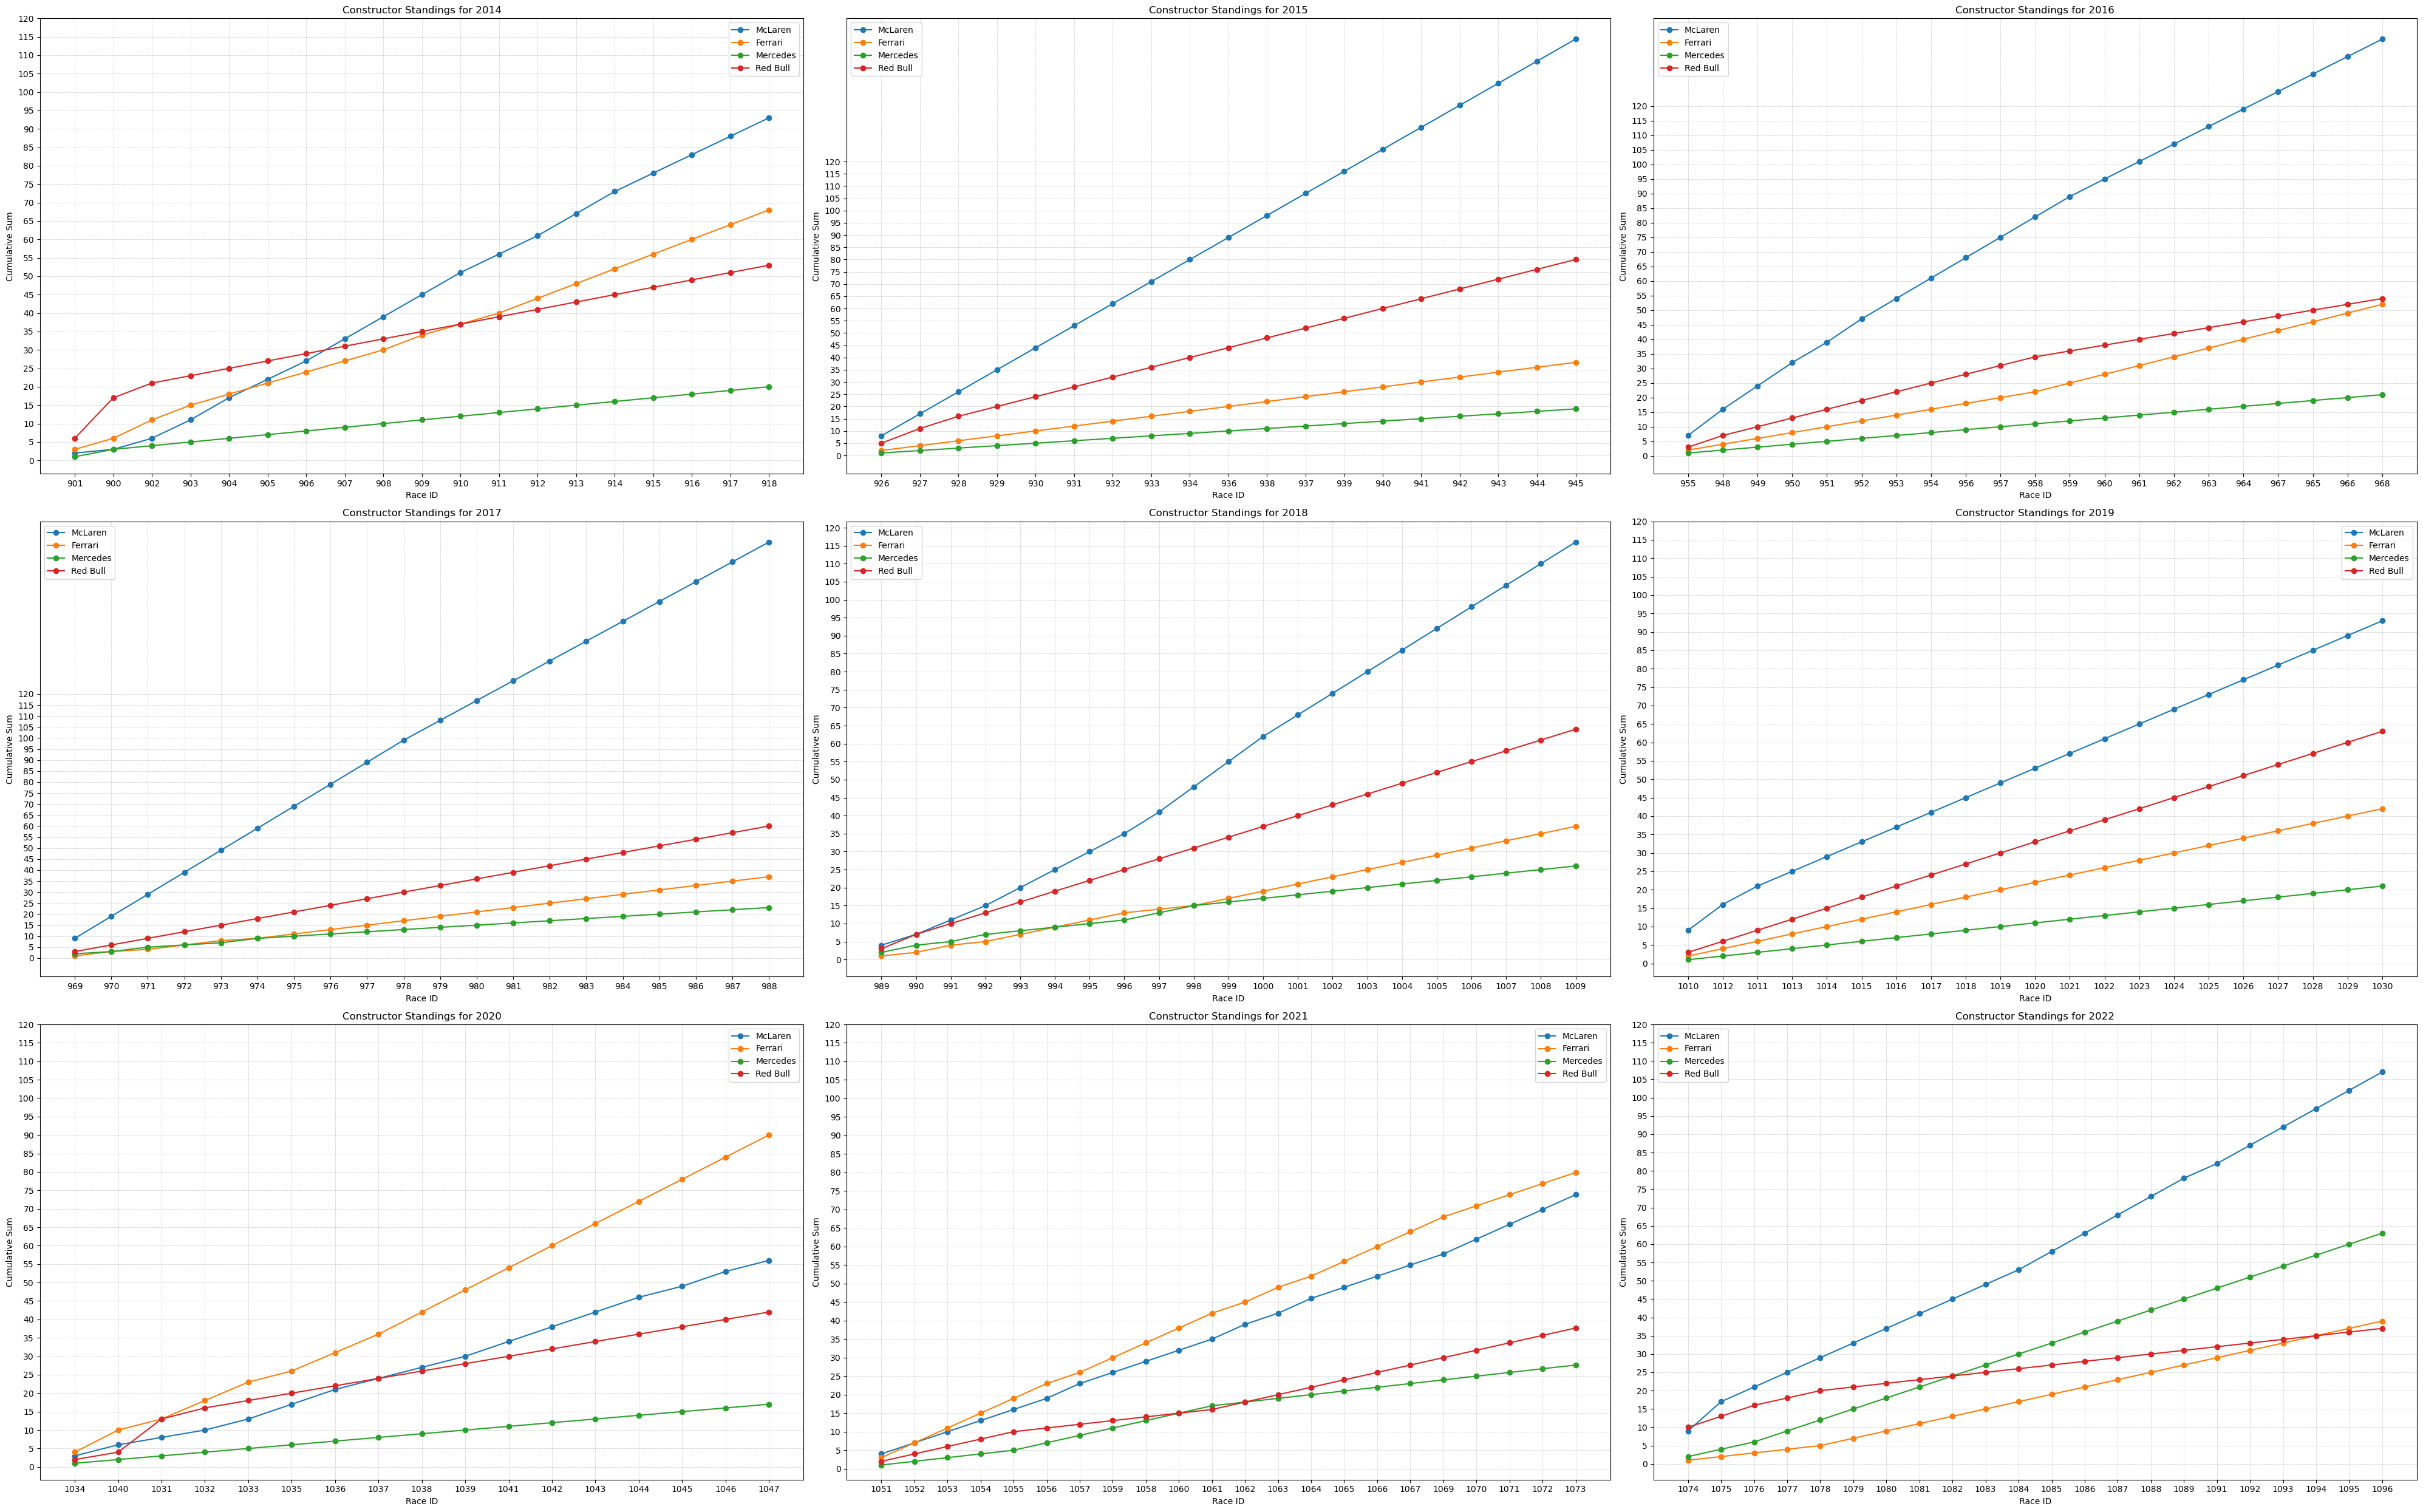

In [169]:
years = [2014, 2015, 2016, 2017,2018,2019,2020,2021,2022]
fig, axes = plt.subplots(3, 3, figsize=(40, 25))
axes = axes.ravel()

for idx, year in enumerate(years):
    ax = axes[idx]
    
    ax.plot(constructor_standings_McLaren[constructor_standings_McLaren['year'] == year]['raceId'].astype(str),
            constructor_standings_McLaren[constructor_standings_McLaren['year'] == year]['cum_sum'],
            label="McLaren",marker='o')

    ax.plot(constructor_standings_Ferrari[constructor_standings_Ferrari['year'] == year]['raceId'].astype(str),
            constructor_standings_Ferrari[constructor_standings_Ferrari['year'] == year]['cum_sum'],
            label="Ferrari",marker='o')

    ax.plot(constructor_standings_Mercedes[constructor_standings_Mercedes['year'] == year]['raceId'].astype(str),
            constructor_standings_Mercedes[constructor_standings_Mercedes['year'] == year]['cum_sum'],
            label="Mercedes",marker='o')

    ax.plot(constructor_standings_Red_Bull[constructor_standings_Red_Bull['year'] == year]['raceId'].astype(str),
            constructor_standings_Red_Bull[constructor_standings_Red_Bull['year'] == year]['cum_sum'],
            label="Red Bull",marker='o')
    

    ax.legend()
    ax.set_xlabel('Race ID')
    ax.set_ylabel('Cumulative Sum')
    ax.set_title(f'Constructor Standings for {year}')
    ax.set_yticks(np.arange(0, 125, 5))
    ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()
#High Score is Bad !